In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PROCESSED = Path("../data/processed")
OUT_FIG = Path("../outputs/figures")
OUT_TAB = Path("../outputs/tables")
DOCS = Path("../docs")

OUT_FIG.mkdir(parents=True, exist_ok=True)
DOCS.mkdir(parents=True, exist_ok=True)


In [5]:
df = pd.read_csv(DATA_PROCESSED / "model_data.csv")

# price_sens = pd.read_csv(OUT_TAB / "price_sensitivity_summary.csv")
perf = pd.read_csv(OUT_TAB / "prediction_performance.csv")
scenarios = pd.read_csv(OUT_TAB / "scenario_results.csv")



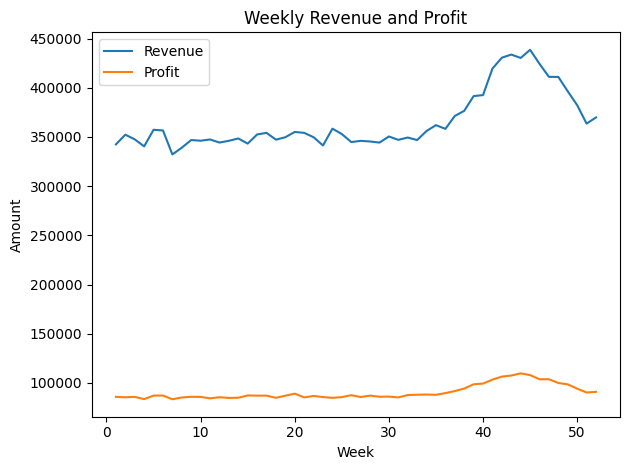

In [6]:
weekly = df.groupby("week").agg({"revenue":"sum", "profit":"sum"}).reset_index()

plt.figure()
plt.plot(weekly["week"], weekly["revenue"], label="Revenue")
plt.plot(weekly["week"], weekly["profit"], label="Profit")
plt.xlabel("Week")
plt.ylabel("Amount")
plt.title("Weekly Revenue and Profit")
plt.legend()
plt.tight_layout()
plt.savefig(OUT_FIG / "weekly_revenue_profit.png", dpi=200)
plt.show()


/var/folders/rq/4vpzqrcx2cscr_bnn_6492pr0000gn/T/ipykernel_47110/494724310.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disc = df.groupby("discount_bucket")["units_sold"].mean().reset_index()


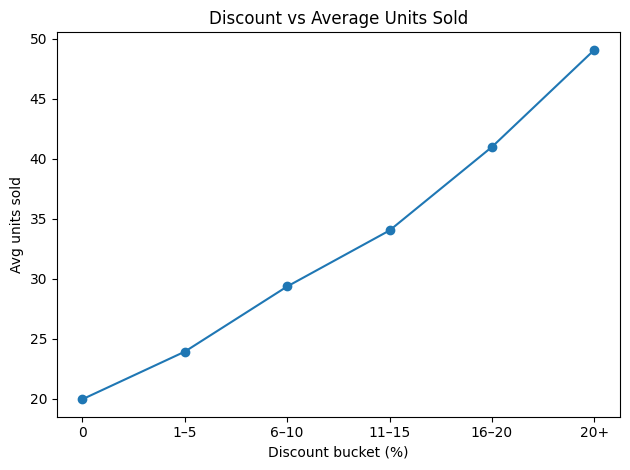

In [7]:
df["discount_bucket"] = pd.cut(
    df["discount_percent"],
    bins=[-0.1, 0, 5, 10, 15, 20, 30],
    labels=["0", "1–5", "6–10", "11–15", "16–20", "20+"]
)

disc = df.groupby("discount_bucket")["units_sold"].mean().reset_index()

plt.figure()
plt.plot(disc["discount_bucket"], disc["units_sold"], marker="o")
plt.xlabel("Discount bucket (%)")
plt.ylabel("Avg units sold")
plt.title("Discount vs Average Units Sold")
plt.tight_layout()
plt.savefig(OUT_FIG / "discount_vs_units.png", dpi=200)
plt.show()


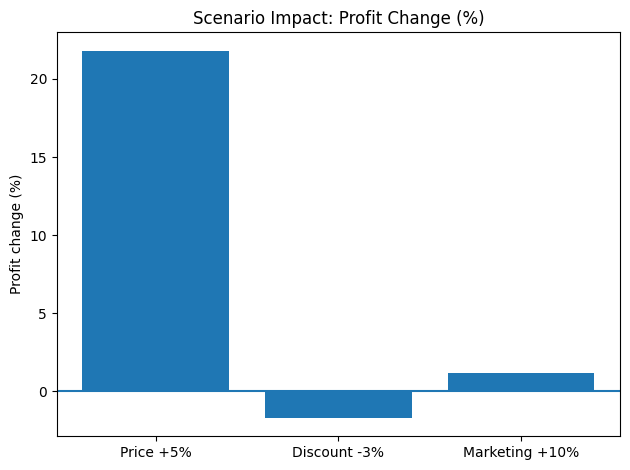

In [8]:
plt.figure()
plt.bar(scenarios["scenario"], scenarios["profit_change_pct"])
plt.axhline(0)
plt.title("Scenario Impact: Profit Change (%)")
plt.ylabel("Profit change (%)")
plt.tight_layout()
plt.savefig(OUT_FIG / "scenario_profit_impact.png", dpi=200)
plt.show()
